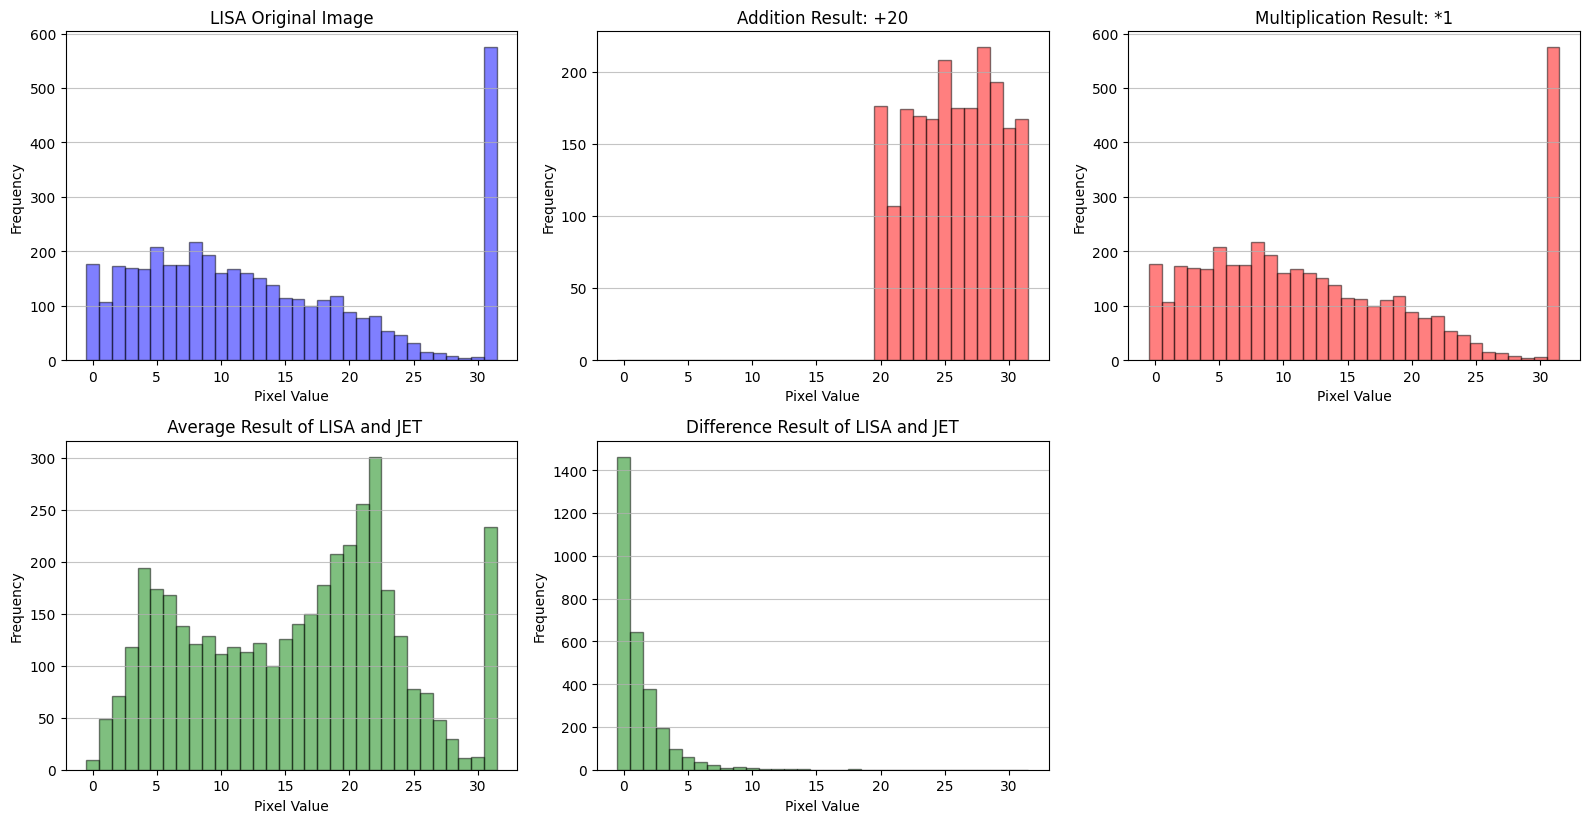

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the .64 image\
# Ask the user to enter the path to the image
image_name = input("Enter the file name of the first image: ")
image_path = image_name+ '.png'
# image_path = 'LISA.png'  # Replace with the path to your .64 image
image2_name = input("Enter the file name of the second image:")
image2_path = image2_name + '.png'
# image2_path = 'LIBERTY.png'  # Replace with the path to your second .64 image

# Load the image and check if it was loaded successfully
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print("Error: Could not load the image.")
else:
    # Create a single figure for all histograms
    plt.figure(figsize=(16, 12))

    # Function to plot and compare histograms
    # def plot_histograms(image1, image2, title1, title2):
    #     plt.figure(figsize=(12, 6))

    #     plt.subplot(1, 2, 1)
    #     plt.hist(image1.ravel(), bins=32, range=(0, 32), color='blue', alpha=0.5, ec='black')
    #     plt.title(title1)
    #     plt.xlabel("Pixel Value")
    #     plt.ylabel("Frequency")

    #     plt.subplot(1, 2, 2)
    #     plt.hist(image2.ravel(), bins=32, range=(0, 32), color='red', alpha=0.5, ec='black')
    #     plt.title(title2)
    #     plt.xlabel("Pixel Value")
    #     plt.ylabel("Frequency")

    #     plt.tight_layout()
    #     plt.show()

    def plot_histogram(image, title, position, custom_color):
        plt.subplot(3, 3, position)
        # Make the x ticks integers line up with the bin centers
        bins = np.arange(33) - 0.5
        # Plot the histogram
        plt.hist(image.ravel(), bins=bins, range=(0, 32), color=custom_color, alpha=0.5, ec='black')
        plt.title(title)
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        # make the bars of the histogram to align with the grid lines
        plt.grid(axis='y', alpha=0.75)
        # # make the grid lines dashed
        # plt.gca().set_axisbelow(True)
        # plt.grid(linestyle='--')
        # # make the bars of the histogram to align with the x cursor
        # plt.axvline(image.mean(), color='k', linestyle='dashed', linewidth=1)
        #讓資料柱子在x軸上對齊刻度
        plt.tight_layout()        

    # Plot the histogram of the original image
    plot_histogram(original_image, image_name +" Original Image", 1, 'blue')

    if original_image.min() >= 0 and original_image.max() <= 32:
        # 1. Add or Subtract a Constant Value
        # Ask the user to enter a constant value
        constant_value = int(input("Enter a constant value to add: "))
        # constant_value = 10
        addition_result = np.clip(original_image + constant_value, 0, 32)  # Ensure values stay in the [0, 32] range
        subtraction_result = np.clip(original_image - constant_value, 0, 32)

        # plot_histograms(original_image, addition_result, "Original Image", "Addition Result")
        # plot_histograms(original_image, subtraction_result, "Original Image", "Subtraction Result")
        plot_histogram(addition_result, "Addition Result: +" + str(constant_value), 2, 'red')

        # 2. Multiply a Constant
        # Ask the user to enter a constant multiplier
        constant_multiplier = int(input("Enter a constant multiplier: "))
        # constant_multiplier = 2
        multiplication_result = np.clip(original_image * constant_multiplier, 0, 32)

        # plot_histograms(original_image, multiplication_result, "Original Image", "Multiplication Result")
        plot_histogram(multiplication_result, "Multiplication Result: *" + str(constant_multiplier), 3, 'red')

        # 3. Average of Two Images
        # Load another .64 image for averaging (replace with the path to the second image)
        # 
        image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
        if image2 is not None:
            average_result = np.clip((original_image + image2) // 2, 0, 32)

            # plot_histograms(original_image, average_result, "Original Image", "Average Result")
            plot_histogram(average_result, " Average Result of " + image_name + " and " + image2_name, 4, 'green')

            # 4. Pixel-wise Difference
            diff_result = np.zeros_like(original_image)
            diff_result[1:, :] = original_image[1:, :] - original_image[:-1, :]

            # plot_histograms(original_image, diff_result, "Original Image", "Difference Result")
            plot_histogram(diff_result, "Difference Result of " + image_name + " and " + image2_name, 5, 'green')
        else:
            print("Error: Could not load the second image.")
    else:
        print("Error: Image pixel values are not in the range [0, 32].")
    
    # Adjust layout and display the combined figure
    plt.savefig(image_name + " and " + image2_name + 'process_comparison_histogram.png')
    plt.show()
